**From Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [216]:
# imported required libraries from tensor flow and keras
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [217]:
# loaded the minst data
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [218]:
# printed the shape of the input data
print(type(train_images))
print(train_images.shape)
print(train_images[251].shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(28, 28)


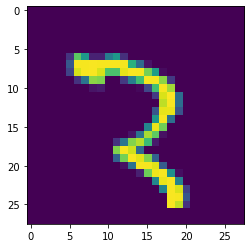

In [219]:
# displayed the data image
plt.imshow(train_images[500])

##process the data
###1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [220]:
# calulated the product of the dimensions
dimData = np.prod(train_images.shape[1:])
print(dimData)
# reshaped the two dimensional image to one dimensional
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
print(train_data.shape)

784
(60000, 784)


#convert data to float and scale values between 0 and 1

In [221]:
# printed the current datatype and coverted into the float
print(train_data.dtype)
train_data = train_data.astype('float')
test_data = test_data.astype('float')
print(train_data.dtype)

uint8
float64


In [222]:
# did not scaled the values from 0 to 255 to 0 to 1
train_data_nonscaled = train_images.reshape(train_images.shape[0],dimData).astype('float')
test_data_nonscaled = test_images.reshape(test_images.shape[0],dimData).astype('float')

In [223]:
# printed max and min in the data of per image
print("max = ", np.amax(train_data_nonscaled))
print("min = ", np.amin(test_data_nonscaled))

max =  255.0
min =  0.0


#scale data

In [224]:
# scaled the data form 0 to 255 to 0 to 1.
print("max = ", np.amax(train_data))
print("min = ", np.amin(train_data))
train_data /=255.0
test_data /=255.0
# printed the max and min in scaled data
print("max = ", np.amax(train_data))
print("min = ", np.amin(train_data))

max =  255.0
min =  0.0
max =  1.0
min =  0.0


change the labels from integer to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [225]:
print(train_labels[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [226]:
# converted the categorical values using one-hot encoding
train_labels_one_hot = to_categorical(train_labels)

test_labels_one_hot = to_categorical(test_labels)

In [227]:
# printed test and train target feature after one hot encoding
print(test_labels[0])
print(train_labels_one_hot[0])

7
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#creating network

In [228]:
# created the empty sequential model
model = Sequential()
# created a layer with 'relu' activation function to each neuron
model.add(Dense(16, activation='relu', input_shape=(dimData,)))
# Added a new layer having 32 neurons with 'relu' activation function  to each neuron
model.add(Dense(32, activation='relu'))
# Added a new layer having 32 neurons with 'soft' activation function to each neuron
model.add(Dense(10, activation='softmax'))

## Question-1

In [229]:
# created the empty sequential model
tanhmodel = Sequential()
# created a 512 layer with 'tanh' activation function to each neuron
tanhmodel.add(Dense(512, activation='tanh', input_shape=(dimData,)))
# Added a new layer having 512 neurons with 'tanh' activation function  to each neuron
tanhmodel.add(Dense(512, activation='tanh'))
# Added a new layer having 512 neurons with 'tanh' activation function  to each neuron
tanhmodel.add(Dense(512, activation='tanh'))
# Added a new layer having 10 neurons with 'softmax' activation function  to each neuron
tanhmodel.add(Dense(10, activation='softmax'))

In [230]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_70 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_71 (Dense)             (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [231]:
tanhmodel.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_73 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_74 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_75 (Dense)             (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


# Compile model

In [232]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [233]:
# compiled the model
tanhmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model

In [234]:
# fit and evalutaed the model with training and testing data with batch size 256
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1)

Epoch 1/10
235/235 [==============================] - 0s 925us/step - loss: 0.8092 - accuracy: 0.7737
Epoch 2/10
235/235 [==============================] - 0s 918us/step - loss: 0.2967 - accuracy: 0.9156
Epoch 3/10
235/235 [==============================] - 0s 889us/step - loss: 0.2469 - accuracy: 0.9295
Epoch 4/10
235/235 [==============================] - 0s 946us/step - loss: 0.2200 - accuracy: 0.9367
Epoch 5/10
235/235 [==============================] - 0s 902us/step - loss: 0.2013 - accuracy: 0.9420
Epoch 6/10
235/235 [==============================] - 0s 901us/step - loss: 0.1891 - accuracy: 0.9460
Epoch 7/10
235/235 [==============================] - 0s 920us/step - loss: 0.1775 - accuracy: 0.9486
Epoch 8/10
235/235 [==============================] - 0s 1ms/step - loss: 0.1679 - accuracy: 0.9512
Epoch 9/10
235/235 [==============================] - 0s 1ms/step - loss: 0.1598 - accuracy: 0.9539
Epoch 10/10
235/235 [==============================] - 0s 914us/step - loss: 0.1533 - 

In [235]:
# fit and evalutaed the model with training and testing data with batch size 256
tanhhistory = tanhmodel.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1)

Epoch 1/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2968 - accuracy: 0.9099
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1331 - accuracy: 0.9588
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0908 - accuracy: 0.9712
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0635 - accuracy: 0.9804
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0480 - accuracy: 0.9850
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0261 - accuracy: 0.9912
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0211 - accuracy: 0.9934
Epoch 9/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0147 - accuracy: 0.9956
Epoch 10/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0115 - accuracy

## Report

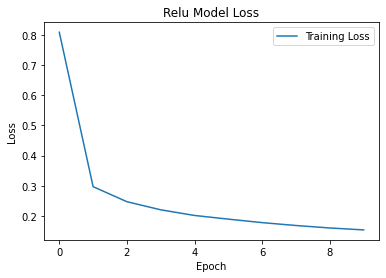

In [236]:
# plotted relu model loss
plt.plot(history.history['loss'])
plt.title('Relu Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss'], loc='upper right')
plt.show()

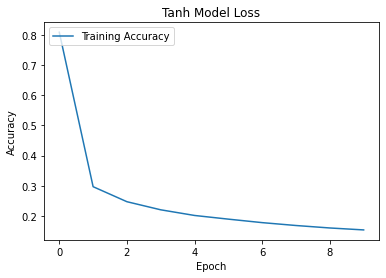

In [242]:
# plotted relu model accuracy
plt.plot(tanhhistory.history['loss'])
plt.title('Tanh Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy'], loc='upper left')
plt.show()

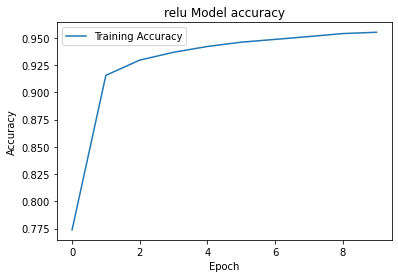

In [243]:
# plotted relu model accuracy
plt.plot(history.history['accuracy'])
plt.title('relu Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy'], loc='upper left')
plt.show()

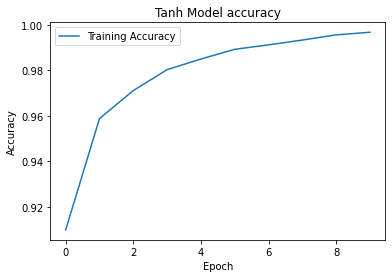

In [244]:
# plotted tanh model accuracy
plt.plot(tanhhistory.history['accuracy'])
plt.title('Tanh Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy'], loc='upper left')
plt.show()

In [245]:
# fit and evalutaed the model with training and testing data with batch size 256
history = model.fit(train_data, train_labels_one_hot, batch_size=256,epochs=10, verbose=1, shuffle=True, validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 0s 1ms/step - loss: 0.1474 - accuracy: 0.9571 - val_loss: 0.1662 - val_accuracy: 0.9515
Epoch 2/10
235/235 [==============================] - 0s 1ms/step - loss: 0.1420 - accuracy: 0.9584 - val_loss: 0.1653 - val_accuracy: 0.9522
Epoch 3/10
235/235 [==============================] - 0s 1ms/step - loss: 0.1380 - accuracy: 0.9592 - val_loss: 0.1578 - val_accuracy: 0.9554
Epoch 4/10
235/235 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9610 - val_loss: 0.1549 - val_accuracy: 0.9543
Epoch 5/10
235/235 [==============================] - 0s 1ms/step - loss: 0.1296 - accuracy: 0.9628 - val_loss: 0.1541 - val_accuracy: 0.9550
Epoch 6/10
235/235 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.9631 - val_loss: 0.1514 - val_accuracy: 0.9548
Epoch 7/10
235/235 [==============================] - 0s 1ms/step - loss: 0.1230 - accuracy: 0.9635 - val_loss: 0.1526 - val_accuracy: 0.9557
Epoch 

In [246]:
# fit and evalutaed the model with training and testing data with batch size 256
tanhhistory = tanhmodel.fit(train_data, train_labels_one_hot, batch_size=256,epochs=10, verbose=1, shuffle=True, validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.0844 - val_accuracy: 0.9749
Epoch 2/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0816 - val_accuracy: 0.9763
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0921 - val_accuracy: 0.9749
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.0749 - val_accuracy: 0.9789
Epoch 5/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.0965 - val_accuracy: 0.9744
Epoch 6/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.0941 - val_accuracy: 0.9770
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0709 - val_accuracy: 0.9807

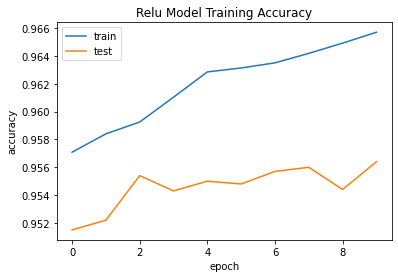

In [247]:
from matplotlib import pyplot as plt
# plotted the test and train accurancy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Relu Model Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

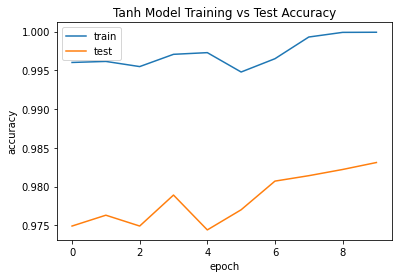

In [250]:
from matplotlib import pyplot as plt
# plotted the tanh test and train accurancy
plt.plot(tanhhistory.history['accuracy'])
plt.plot(tanhhistory.history['val_accuracy'])
plt.title('Tanh Model Training vs Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

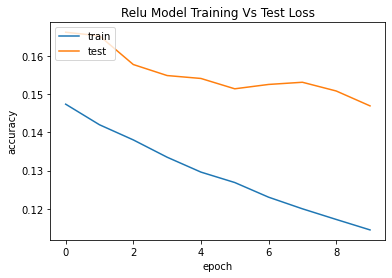

In [251]:
from matplotlib import pyplot as plt
# plotted the Relu model test and train accurancy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Relu Model Training Vs Test Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

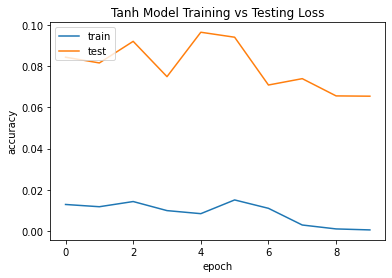

In [252]:
from matplotlib import pyplot as plt
# plotted the test and train accurancy
plt.plot(tanhhistory.history['loss'])
plt.plot(tanhhistory.history['val_loss'])
plt.title('Tanh Model Training vs Testing Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Question - 3 - without scaling

In [253]:
# taken the non scaled tanh model
tanhhistorynonscaled = tanhmodel.fit(train_data_nonscaled, train_labels_one_hot, batch_size=256,epochs=10, verbose=1, shuffle=True, validation_data=(test_data_nonscaled, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1063 - accuracy: 0.9678 - val_loss: 0.1997 - val_accuracy: 0.9391
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1443 - accuracy: 0.9530 - val_loss: 0.1585 - val_accuracy: 0.9523
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1166 - accuracy: 0.9623 - val_loss: 0.1367 - val_accuracy: 0.9588
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1032 - accuracy: 0.9661 - val_loss: 0.1357 - val_accuracy: 0.9567
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0875 - accuracy: 0.9705 - val_loss: 0.1253 - val_accuracy: 0.9602
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0870 - accuracy: 0.9713 - val_loss: 0.1293 - val_accuracy: 0.9586
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0843 - accuracy: 0.9723 - val_loss: 0.1236 - val_accuracy: 0.9628

In [254]:
# fit and evalutaed the relu model with training and testing data with batch size 256
Reluhistory = model.fit(train_data_nonscaled, train_labels_one_hot, batch_size=256,epochs=10, verbose=1, shuffle=True, validation_data=(test_data_nonscaled, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 0s 1ms/step - loss: 18.4488 - accuracy: 0.9495 - val_loss: 18.0154 - val_accuracy: 0.9469
Epoch 2/10
235/235 [==============================] - 0s 1ms/step - loss: 9.7537 - accuracy: 0.9590 - val_loss: 15.0423 - val_accuracy: 0.9492
Epoch 3/10
235/235 [==============================] - 0s 1ms/step - loss: 7.4244 - accuracy: 0.9608 - val_loss: 14.0758 - val_accuracy: 0.9449
Epoch 4/10
235/235 [==============================] - 0s 1ms/step - loss: 6.1820 - accuracy: 0.9623 - val_loss: 12.5322 - val_accuracy: 0.9457
Epoch 5/10
235/235 [==============================] - 0s 1ms/step - loss: 5.3127 - accuracy: 0.9623 - val_loss: 11.3508 - val_accuracy: 0.9470
Epoch 6/10
235/235 [==============================] - 0s 1ms/step - loss: 4.6470 - accuracy: 0.9645 - val_loss: 10.2061 - val_accuracy: 0.9475
Epoch 7/10
235/235 [==============================] - 0s 1ms/step - loss: 4.0127 - accuracy: 0.9651 - val_loss: 9.9307 - val_accuracy: 0.9469

In [255]:
print("max = ", np.amax(train_data_nonscaled))
print("min = ", np.amin(train_data_nonscaled))

max =  255.0
min =  0.0


In [256]:
# created a new functional API model from scratch
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(dimData,))
dense = layers.Dense(512, activation="relu")
x = dense(inputs)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(10, activation='softmax')(x)
modelfunctional = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
modelfunctional.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_76 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_77 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_78 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [257]:
modelfunctional.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [258]:
# fit and evalutaed the model with training and testing data with batch size 256
history = modelfunctional.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2656 - accuracy: 0.9248 - val_loss: 0.1215 - val_accuracy: 0.9614
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0926 - accuracy: 0.9719 - val_loss: 0.0910 - val_accuracy: 0.9720
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0567 - accuracy: 0.9826 - val_loss: 0.0751 - val_accuracy: 0.9769
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0364 - accuracy: 0.9883 - val_loss: 0.0798 - val_accuracy: 0.9764
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0661 - val_accuracy: 0.9793
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0726 - val_accuracy: 0.9785
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0731 - val_accuracy: 0.9807
Epoch

## Another Approach for functional API conversion

In [259]:
from keras import layers, models
# we have taken the previous tanh model and iterated each layer and converted to sequential model
input_layer = layers.Input(batch_shape=tanhmodel.layers[0].input_shape)
prev_layer = input_layer
for layer in tanhmodel.layers:
    prev_layer = layer(prev_layer)

funcmodel = models.Model([input_layer], [prev_layer])

In [260]:
# compiled the above sequential model
funcmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [261]:
# fit and evalutaed the model with training and testing data with batch size 256
historyfunc = funcmodel.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0360 - accuracy: 0.9879 - val_loss: 0.0738 - val_accuracy: 0.9775
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0696 - val_accuracy: 0.9800
Epoch 3/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.0657 - val_accuracy: 0.9820
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0706 - val_accuracy: 0.9811
Epoch 5/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0688 - val_accuracy: 0.9815
Epoch 6/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0726 - val_accuracy: 0.9803
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0848 - val_accuracy: 0.9775

In [262]:
test_scores = model.evaluate(test_data, test_labels_one_hot, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.5931 - accuracy: 0.8822
Test loss: 0.5931286215782166
Test accuracy: 0.8822000026702881


## predicting the data

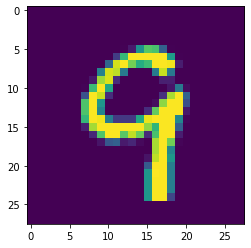

In [263]:
plt.imshow(test_images[150])

In [271]:
model.save("mnistmodel.h5")
img = test_images[150]
test_img = img.reshape((1,784))
# using the sequential model predicted the class number it belongs to
img_class = model.predict(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
print("Predicted digit:",img_class.argmax())

Class:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted digit: 9


## Bonus Points

In [272]:
modelsparc = Sequential()
modelsparc.add(Dense(16, activation='relu', input_shape=(dimData,)))
modelsparc.add(Dense(32, activation='relu'))
modelsparc.add(Dense(10, activation='softmax'))
modelsparc.summary()
modelsparc.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
# fit and evalutaed the model with training and testing data with batch size 256
# also removed the one hot encoding because we are using sparse_categorical_crossentropy
historysparc = modelsparc.fit(train_data, train_labels, batch_size=256,epochs=11, verbose=1, shuffle=True, validation_data=(test_data, test_labels))


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_86 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_87 (Dense)             (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/11
235/235 [==============================] - 1s 3ms/step - loss: 0.7881 - accuracy: 0.7659 - val_loss: 0.3164 - val_accuracy: 0.9132
Epoch 2/11
235/235 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.9186 - val_loss: 0.2511 - val_accuracy: 0.9302
Epoch 3/11
235/235 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.

In [274]:
historysparc = modelsparc.fit(train_data, train_labels_one_hot, batch_size=256,epochs=11, verbose=1, shuffle=True, validation_data=(test_data, test_labels))

Epoch 1/11


ValueError: in user code:

    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:792 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\keras\engine\compile_utils.py:457 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\keras\utils\metrics_utils.py:73 decorated
        update_op = update_state_fn(*args, **kwargs)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\keras\metrics.py:177 update_state_fn
        return ag_update_state(*args, **kwargs)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\keras\metrics.py:681 update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\keras\metrics.py:3529 sparse_categorical_accuracy
        y_true = tf.squeeze(y_true, [-1])
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\ops\array_ops.py:4537 squeeze_v2
        return squeeze(input, axis, name)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\util\deprecation.py:549 new_func
        return func(*args, **kwargs)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\ops\array_ops.py:4485 squeeze
        return gen_array_ops.squeeze(input, axis, name)
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\ops\gen_array_ops.py:10197 squeeze
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\ops.py:3561 _create_op_internal
        ret = Operation(
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 10 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](IteratorGetNext:1)' with input shapes: [?,10].


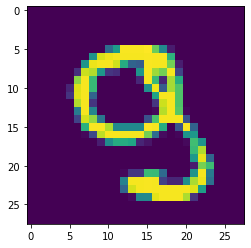

In [269]:
plt.imshow(test_images[151])

In [275]:
img = test_images[151]
test_img = img.reshape((1,784))
img_class = modelsparc.predict(test_img)
prediction = img_class[0]
classname = img_class[0]
print("prediction: ",prediction)
print("Class: ",classname)
# used the numpy to predict the class
print("Predicted digit:",np.argmax(img_class))

prediction:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Class:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted digit: 9
